In [1]:
import os
import pandas as pd

In [2]:
folder_path = './Corpus'  

In [3]:
df = pd.DataFrame(columns=['Filename', 'Lyrics'])

for file in os.listdir(folder_path):
    if file.endswith('.txt'):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r', encoding='utf-8') as file:
            lyrics = file.read()
            df = df.append({'Filename': file.name, 'Lyrics': lyrics}, ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4788\2760509115.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': file.name, 'Lyrics': lyrics}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4788\2760509115.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': file.name, 'Lyrics': lyrics}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4788\2760509115.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Filename': file.name, 'Lyrics': lyrics}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4788\2760509115.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [4]:
print(df.head())

                            Filename  \
0         ./Corpus\(G)I-DLE_I Do.txt   
1  ./Corpus\(G)I-DLE_I Want That.txt   
2   ./Corpus\aespa_Better Things.txt   
3            ./Corpus\BTS_Butter.txt   
4          ./Corpus\BTS_Dynamite.txt   

                                              Lyrics  
0  I DO\nby\n(G)I-DLE\n2023\n\nHit me like a shot...  
1  I Want That\nby\n(G)I-DLE\n2023\n\nI want the ...  
2  Better Things\nby\naespa\n2023\n\nOh, oh, oh\n...  
3  Butter\nby\nBTS\n2021\n\nSmooth like butter\nL...  
4  Dynamite\nby\nBTS\n2020\n\n'Cause, ah-ah, I'm ...  


In [5]:
df.to_csv('lyrics_dataset.csv', index=False)

In [6]:
#Cleaning and formatting

df['Cleaned_Lyrics'] = df['Lyrics'].str.replace("[^a-zA-Z0-9\s]", "", regex=True).str.lower()

In [7]:
df.to_csv('cleaned_lyrics.csv', index=False)

In [12]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.6/12.8 MB 12.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.7/12.8 MB 17.6 MB/s eta 0:00:01
     -------- ------------------------------- 2.7/12.8 MB 18.9 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 20.3 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.8 MB 20.8 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 21.9 MB/s eta 0:00:01
     --------------------- ------------------ 6.7/12.8 MB 21.6 MB/s eta 0:00:01
     ----------------------- ---------------- 7.7/12.8 MB 21.4 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 21.4 MB/s eta 0:00:01
     ------------------------------ --------- 9.8/12.8 MB 21.7 MB/s eta 0:00:01
     --------------------------------- ----- 10.9/12.8 MB 22.6 MB/s eta 0:00:01
     ----------------------------------- --- 11.

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [14]:
# Tokens
df['Tokens'] = df['Cleaned_Lyrics'].apply(lambda x: [token.text for token in nlp(x)])

In [15]:
print(df['Tokens'].head())

0    [i, do, \n, by, \n, gidle, \n, 2023, \n\n, hit...
1    [i, want, that, \n, by, \n, gidle, \n, 2023, \...
2    [better, things, \n, by, \n, aespa, \n, 2023, ...
3    [butter, \n, by, \n, bts, \n, 2021, \n\n, smoo...
4    [dynamite, \n, by, \n, bts, \n, 2020, \n\n, ca...
Name: Tokens, dtype: object


In [16]:
# Lemmas
df['Lemmas'] = df['Cleaned_Lyrics'].apply(lambda x: [token.lemma_ for token in nlp(x)])

In [17]:
print(df['Lemmas'].head())

0    [I, do, \n, by, \n, gidle, \n, 2023, \n\n, hit...
1    [I, want, that, \n, by, \n, gidle, \n, 2023, \...
2    [well, thing, \n, by, \n, aespa, \n, 2023, \n\...
3    [butter, \n, by, \n, bt, \n, 2021, \n\n, smoot...
4    [dynamite, \n, by, \n, bt, \n, 2020, \n\n, cau...
Name: Lemmas, dtype: object


In [18]:
# Parts-of-speech
df['POS'] = df['Cleaned_Lyrics'].apply(lambda x: [token.pos_ for token in nlp(x)])

In [19]:
print(df['POS'].head())

0    [PRON, AUX, SPACE, ADP, SPACE, NOUN, SPACE, NU...
1    [PRON, VERB, SCONJ, SPACE, ADP, SPACE, NOUN, S...
2    [ADJ, NOUN, SPACE, ADP, SPACE, NOUN, SPACE, NU...
3    [NOUN, SPACE, ADP, SPACE, NOUN, SPACE, NUM, SP...
4    [NOUN, SPACE, ADP, SPACE, NOUN, SPACE, NUM, SP...
Name: POS, dtype: object


In [22]:
df.to_csv('annotated_lyrics.csv', index=False)

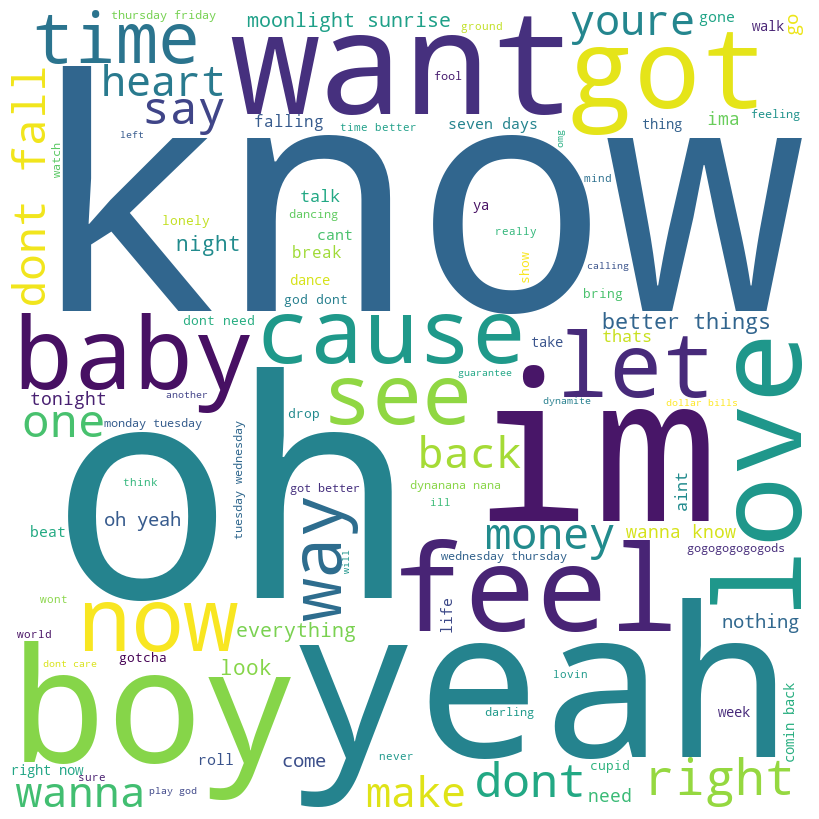

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

all_lyrics = ' '.join(df['Cleaned_Lyrics'])

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = STOPWORDS, 
                      min_font_size = 10).generate(all_lyrics)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show()

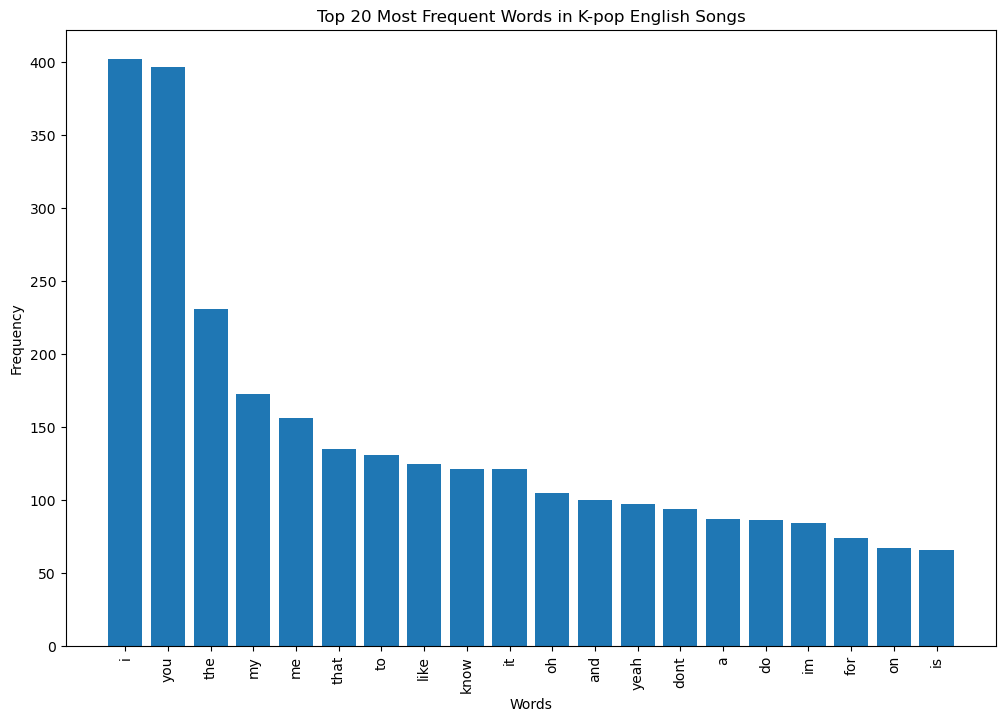

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

# The most common words in statistics
word_freq = Counter(" ".join(df["Cleaned_Lyrics"]).split()).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(12,8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.title('Top 20 Most Frequent Words in K-pop English Songs')
plt.show()

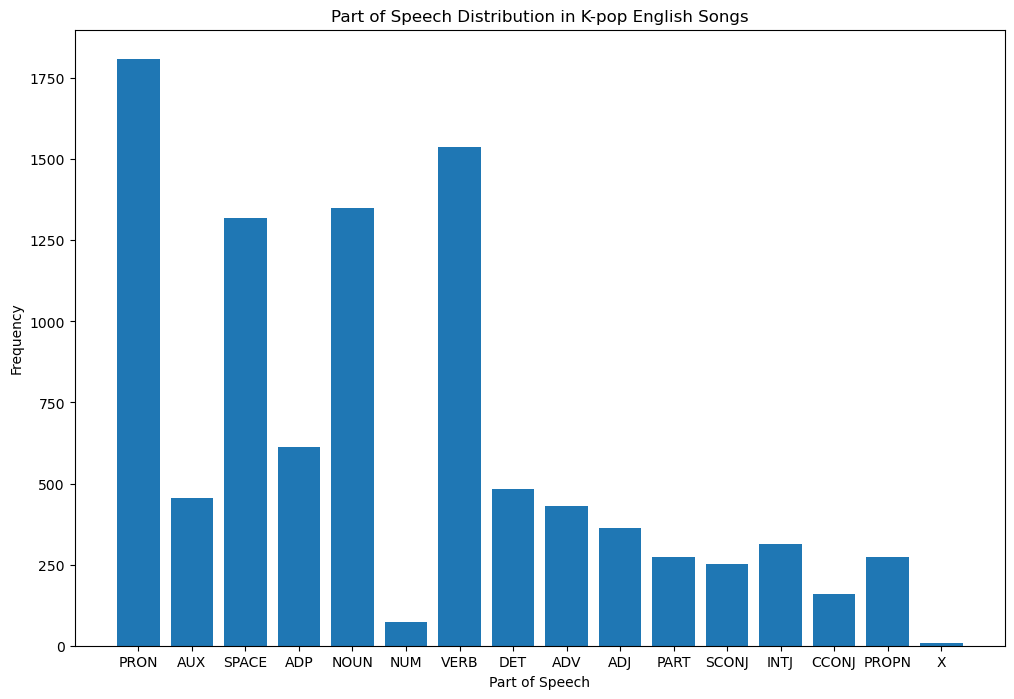

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

pos_list = [pos for sublist in df['POS'] for pos in sublist]
pos_freq = Counter(pos_list)

plt.figure(figsize=(12,8))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Part of Speech Distribution in K-pop English Songs')
plt.show()